In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import folium as fo
import plotly as ply
import plotly.graph_objects as go
import matplotlib

from matplotlib.gridspec import GridSpec
from matplotlib.ticker import FuncFormatter
import matplotlib as mpl
import seaborn as sns
from matplotlib.colors import ListedColormap
import matplotlib.patches as mpatches
import matplotlib

In [ ]:
colors_pr = [#'#3cb44b',green for land use
           
          '#1f2f45',
           '#a09b9a',
    '#795a50',
    'orange',#hydro
    'pink', #nuclear
    '#00B4D8', #wind
    'yellow', #solar
    '#028A0F'# biomass
          ]

primary_cm = ListedColormap(colors_pr, name='my_colormap')

In [ ]:
colors_fn = [#'#3cb44b',green for land use
           
          '#1f2f45',
           '#a09b9a',
    '#795a50',
    '#00B4D8',#elec
    '#028A0F', #bio
    'purple', #hydrogen
    'orange' #dac

          ]

primary_fn = ListedColormap(colors_fn, name='my_colormap')

In [4]:
p_s = pd.read_excel("primary_energy_0821_80p.xlsx", sheet_name='stick').iloc[:, :14]
p_2030nl = pd.read_excel("primary_energy_0821_80p.xlsx", sheet_name='2030_nl').iloc[:, :14]
p_2030l = pd.read_excel("primary_energy_0821_80p.xlsx", sheet_name='2030_l').iloc[:, :14]
p_2040nl = pd.read_excel("primary_energy_0821_80p.xlsx", sheet_name='2040_nl').iloc[:, :14]
p_2040l = pd.read_excel("primary_energy_0821_80p.xlsx", sheet_name='2040_l').iloc[:, :14]

f_s = pd.read_excel("final_energy_0821_80p.xlsx", sheet_name='stick').iloc[:, :14]
f_2030nl = pd.read_excel("final_energy_0821_80p.xlsx", sheet_name='2030_nl').iloc[:, :14]
f_2030l = pd.read_excel("final_energy_0821_80p.xlsx", sheet_name='2030_l').iloc[:, :14]
f_2040nl = pd.read_excel("final_energy_0821_80p.xlsx", sheet_name='2040_nl').iloc[:, :14]
f_2040l = pd.read_excel("final_energy_0821_80p.xlsx", sheet_name='2040_l').iloc[:, :14]

In [5]:
all_p=[p_s, p_2030nl, p_2030l, p_2040nl, p_2040l]
all_f = [f_s, f_2030nl, f_2030l, f_2040nl, f_2040l]

In [6]:
def primary(df):
    all_p = df['fuel'].unique()
    all_p
    p_order = ['a oil', 'b natural gas', 'c coal',
              'traded oil', 'traded natural gas', 'traded coal',
               'f hydro', 'e nuclear', 'g wind', 'h solar', 'd biomass'
              ]
    
    
    
    # sum them all
    plot_x = pd.DataFrame()
    name = 'Stick'
    for pr in p_order:
        filtered_df = df[df['fuel'] == pr]
        sum_by_columns = filtered_df[['i2015', 'i2020', 'i2025', 'i2030', 'i2035', 'i2040',
                                     'i2045', 'i2050']].sum(axis=0)
        plot_x[pr] = sum_by_columns
    # plot_x

    # add all oil, gas, coal
    plot_x['oil'] = plot_x['traded oil'] + plot_x['a oil']
    plot_x['natural gas'] = plot_x['traded natural gas'] + plot_x['b natural gas']
    plot_x['coal'] = plot_x['traded coal'] + plot_x['c coal']
    plot_x = plot_x.drop(['a oil', 'b natural gas', 'c coal', 'traded oil', 'traded natural gas', 'traded coal'], axis=1)
    pr_order = ['oil', 'natural gas', 'coal',
               'f hydro', 'e nuclear', 'g wind', 'h solar', 'd biomass'
              ]

    plot_x = plot_x.reindex(columns=pr_order)
    return(plot_x)

In [7]:
all_p_processed = [primary(df) for df in all_p]
np_s = all_p_processed[0]
np_30nl = all_p_processed[1]
np_30l = all_p_processed[2]
np_40nl = all_p_processed[3]
np_40l = all_p_processed[4]

years = ['2015', '2020', '2025', '2030', '2035','2040', '2045', '2050']
np_s.index = years
np_30nl.index = years
np_30l.index = years
np_40nl.index = years
np_40l.index = years

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


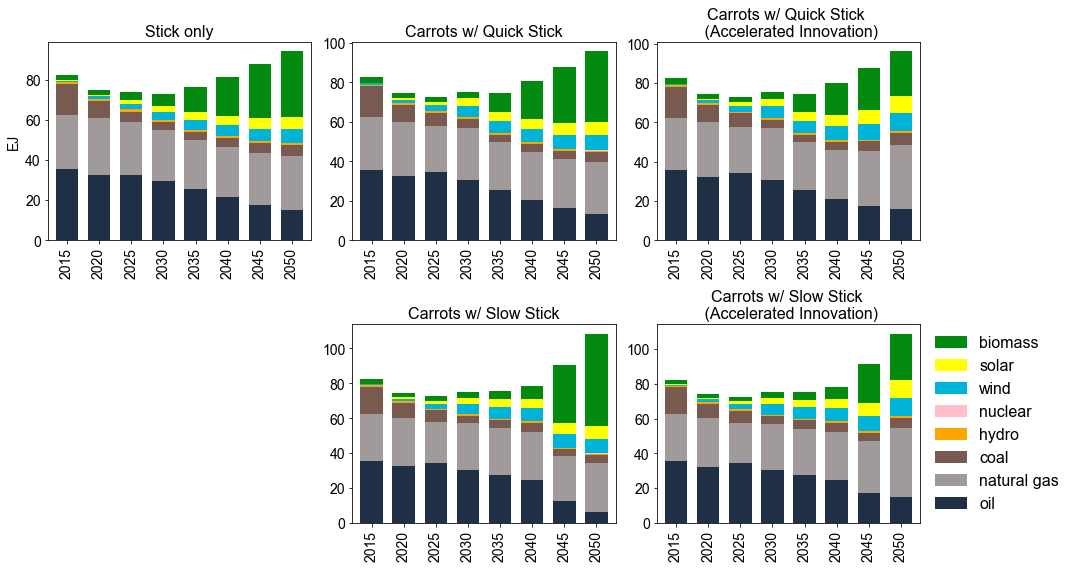

<Figure size 432x288 with 0 Axes>

In [24]:

# 设置全局字体为Arial
mpl.rcParams['font.family'] = 'Arial'

# 创建图形和子图
fig, axs = plt.subplots(2, 3, figsize=(15, 8), gridspec_kw={'width_ratios': [1, 1, 1], 'height_ratios': [1, 1]})

# plt.suptitle("Primary energy consumption 2015~2050", fontsize=18)

# 创建一个空的子图，位置是第二行第一个
axs[1, 0].axis('off')

# 绘制每个子图
np_s.plot(kind='bar', stacked=True, ax=axs[0, 0], cmap=primary_cm, width=0.7)
np_30nl.plot(kind='bar', stacked=True, ax=axs[0, 1], cmap=primary_cm, width=0.7)
np_30l.plot(kind='bar', stacked=True, ax=axs[0, 2], cmap=primary_cm, width=0.7)
np_40nl.plot(kind='bar', stacked=True, ax=axs[1, 1], cmap=primary_cm, width=0.7)
np_40l.plot(kind='bar', stacked=True, ax=axs[1, 2], cmap=primary_cm, width=0.7)



# 去除图例
for ax in axs.flat:
    ax.legend().remove()
#     ax.set_ylim(-150, 0)
    ax.tick_params(axis='both', which='major', labelsize=14)


# 设置标题和坐标轴标签
axs[0, 0].set_title('Stick only', fontsize=16)
axs[0, 0].set_ylabel('EJ', fontsize=14)

axs[0, 1].set_title('Carrots w/ Quick Stick', fontsize=16)
axs[0, 2].set_title('Carrots w/ Quick Stick \n (Accelerated Innovation)', fontsize=16)
axs[1, 1].set_title('Carrots w/ Slow Stick', fontsize=16)
axs[1, 2].set_title('Carrots w/ Slow Stick \n (Accelerated Innovation)', fontsize=16)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), frameon=False, fontsize=16)

# Add a global legend with reversed order



labels
handles, labels = plt.gca().get_legend_handles_labels()
# Dictionary of patterns to replace
replacements = {
    "d biomass": "biomass",
    "f hydro": "hydro",
    "g wind": "wind",
    "h solar": "solar",
    "e nuclear": "nuclear"
}

# Replace patterns in each label
for i, label in enumerate(labels):
    for old, new in replacements.items():
        labels[i] = labels[i].replace(old, new)

# Set the legend with the updated, reversed order
plt.legend(handles[::-1], labels[::-1], loc='center left', bbox_to_anchor=(1, 0.5), frameon=False, fontsize=16)

# Automatically adjust layout and show plot
plt.tight_layout()
plt.show()    
# 自动调整布局
plt.tight_layout()
# 显示图形
plt.show()


In [20]:
labels


['oil',
 'natural gas',
 'coal',
 'f hydro',
 'e nuclear',
 'g wind',
 'h solar',
 'd biomass']

In [10]:
# now let's do final

In [11]:
def final(df):
    p_order = ['coal', 'gas', 'refined liquids',
              'electricity', 'biomass', 'hydrogen',
               'process heat dac'
              ]
    # sum them all
    plot_x = pd.DataFrame()
    for pr in p_order:
        filtered_df = df[df['fuel'] == pr]
        sum_by_columns = filtered_df[['i2015', 'i2020', 'i2025', 'i2030', 'i2035', 'i2040',
                                     'i2045', 'i2050']].sum(axis=0)
        plot_x[pr] = sum_by_columns
    # plot_x

    # add all oil, gas, coal
#     plot_x['oil'] = plot_x['traded oil'] + plot_x['a oil']
#     plot_x['natural gas'] = plot_x['traded natural gas'] + plot_x['b natural gas']
#     plot_x['coal'] = plot_x['traded coal'] + plot_x['c coal']
#     plot_x = plot_x.drop(['a oil', 'b natural gas', 'c coal', 'traded oil', 'traded natural gas', 'traded coal'], axis=1)
#     pr_order = ['oil', 'natural gas', 'coal',
#                'f hydro', 'e nuclear', 'g wind', 'h solar', 'd biomass'
#               ]

    plot_x = plot_x.reindex(columns=p_order)
    return(plot_x)

In [12]:
all_f_processed = [final(df) for df in all_f]
nf_s = all_f_processed[0]
nf_30nl = all_f_processed[1]
nf_30l = all_f_processed[2]
nf_40nl = all_f_processed[3]
nf_40l = all_f_processed[4]

years = ['2015', '2020', '2025', '2030', '2035','2040', '2045', '2050']
nf_s.index = years
nf_30nl.index = years
nf_30l.index = years
nf_40nl.index = years
nf_40l.index = years

In [13]:
#final_map

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


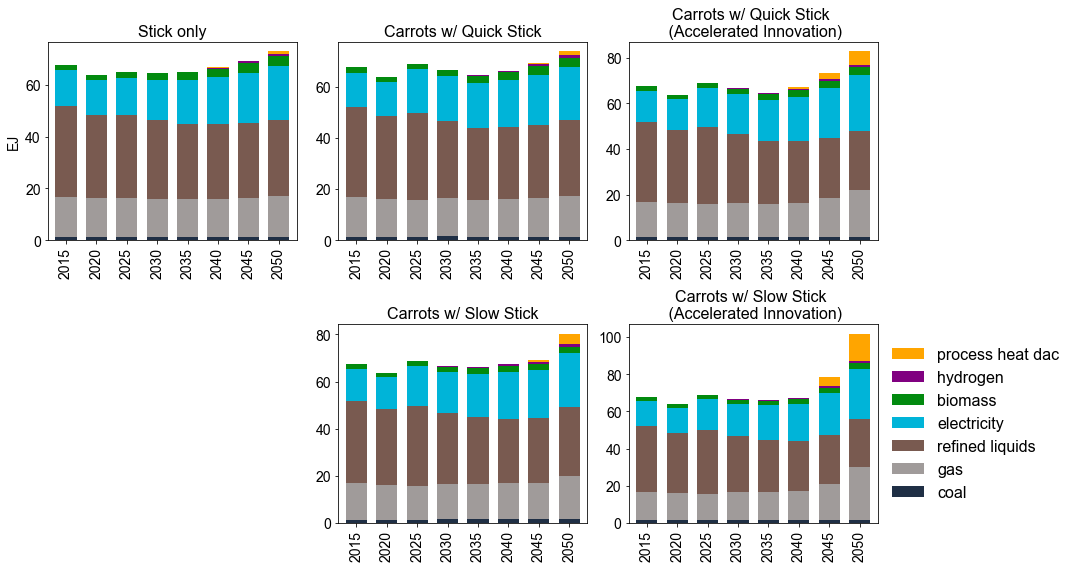

In [25]:

# 设置全局字体为Arial
mpl.rcParams['font.family'] = 'Arial'

# 创建图形和子图
fig, axs = plt.subplots(2, 3, figsize=(15, 8), gridspec_kw={'width_ratios': [1, 1, 1], 'height_ratios': [1, 1]})

# plt.suptitle("Final energy consumption 2015~2050", fontsize=18)

# 创建一个空的子图，位置是第二行第一个
axs[1, 0].axis('off')

# 绘制每个子图
nf_s.plot(kind='bar', stacked=True, ax=axs[0, 0], cmap=primary_fn, width=0.7)
nf_30nl.plot(kind='bar', stacked=True, ax=axs[0, 1], cmap=primary_fn, width=0.7)
nf_30l.plot(kind='bar', stacked=True, ax=axs[0, 2], cmap=primary_fn, width=0.7)
nf_40nl.plot(kind='bar', stacked=True, ax=axs[1, 1], cmap=primary_fn, width=0.7)
nf_40l.plot(kind='bar', stacked=True, ax=axs[1, 2], cmap=primary_fn, width=0.7)

# 去除图例
for ax in axs.flat:
    ax.legend().remove()
    ax.tick_params(axis='both', which='major', labelsize=14)




# 设置标题和坐标轴标签
axs[0, 0].set_title('Stick only', fontsize=16)
axs[0, 0].set_ylabel('EJ', fontsize=14)

axs[0, 1].set_title('Carrots w/ Quick Stick', fontsize=16)
axs[0, 2].set_title('Carrots w/ Quick Stick \n (Accelerated Innovation)', fontsize=16)
axs[1, 1].set_title('Carrots w/ Slow Stick', fontsize=16)
axs[1, 2].set_title('Carrots w/ Slow Stick \n (Accelerated Innovation)', fontsize=16)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), frameon=False, fontsize=16)
# Add a global legend with reversed order
handles, labels = plt.gca().get_legend_handles_labels()
plt.legend(handles[::-1], labels[::-1], loc='center left', bbox_to_anchor=(1, 0.5), frameon=False, fontsize=16)

# 自动调整布局
plt.tight_layout()
# 显示图形
plt.show()
